# LINEAR REGRESSION EXERCISE

Kaggle dataset and competition: https://www.kaggle.com/paolocons/small-dataset-about-used-fiat-500-sold-in-italy

Example used as base: https://www.kaggle.com/javihm77/fiat500-linear-regression

In [1]:
import pandas as pd #we use this to load, read and transform the dataset
import numpy as np #we use this for statistical analysis
import matplotlib.pyplot as plt #we use this to visualize the dataset
import seaborn as sns #we use this to make countplots
import sklearn.metrics as sklm #This is to test the models

In [2]:
#here we load the train data
data = pd.read_csv('Used_fiat_500_in_Italy_dataset.csv')

#and immediately I would like to see how this dataset looks like
data.head(8)

,model,engine_power,transmission,age_in_days,km,previous_owners,lat,lon,price
0,pop,69,manual,4474,56779,2,45.071079,7.46403,4490
1,lounge,69,manual,2708,160000,1,45.069679,7.70492,4500
2,lounge,69,automatic,3470,170000,2,45.514599,9.28434,4500
3,sport,69,manual,3288,132000,2,41.903221,12.49565,4700
4,sport,69,manual,3712,124490,2,45.532661,9.03892,4790
5,lounge,69,manual,3684,91000,1,40.774780,14.59192,4900
6,lounge,69,automatic,4353,90068,1,41.726700,13.00980,4950
7,pop,69,manual,4414,69000,2,45.056599,9.70176,5290


In [3]:
#now let's look closer at the dataset we got
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   model            380 non-null    object 
 1   engine_power     380 non-null    int64  
 2   transmission     380 non-null    object 
 3   age_in_days      380 non-null    int64  
 4   km               380 non-null    int64  
 5   previous_owners  380 non-null    int64  
 6   lat              380 non-null    float64
 7   lon              380 non-null    float64
 8   price            380 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 26.8+ KB


In [4]:
data.shape

(380, 9)

In [5]:
data.describe()

,engine_power,age_in_days,km,previous_owners,lat,lon,price
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,73.015789,3310.265789,102196.250000,1.510526,44.257712,10.742644,5881.655263
std,9.984672,1437.555063,47115.355234,0.560244,1.767518,2.167753,2170.617946
min,69.000000,91.000000,4981.000000,1.000000,37.510872,7.320720,2890.000000
25%,69.000000,3097.250000,76611.750000,1.000000,43.514196,9.159140,4600.000000
50%,69.000000,3927.000000,112000.000000,1.000000,45.069679,10.301505,5000.000000
75%,69.000000,4322.000000,135000.000000,2.000000,45.556942,12.346788,5500.000000
max,101.000000,4719.000000,259000.000000,4.000000,46.781651,18.168011,15900.000000


In [6]:
#Let's see what the options are in the model column (the objects)
print(data['model'].unique())

['pop' 'lounge' 'sport' 'star']


In [7]:
#Let's see what the options are in the transmission column (the objects)
print(data['transmission'].unique())

['manual' 'automatic']


In [8]:
#setting green color for graphics
green_col = "#3d9979"

(array([ 33., 240.,  26.,  16.,  11.,  36.,  12.,   5.,   0.,   1.]),
 array([ 2890.,  4191.,  5492.,  6793.,  8094.,  9395., 10696., 11997.,
        13298., 14599., 15900.]),
 <BarContainer object of 10 artists>)

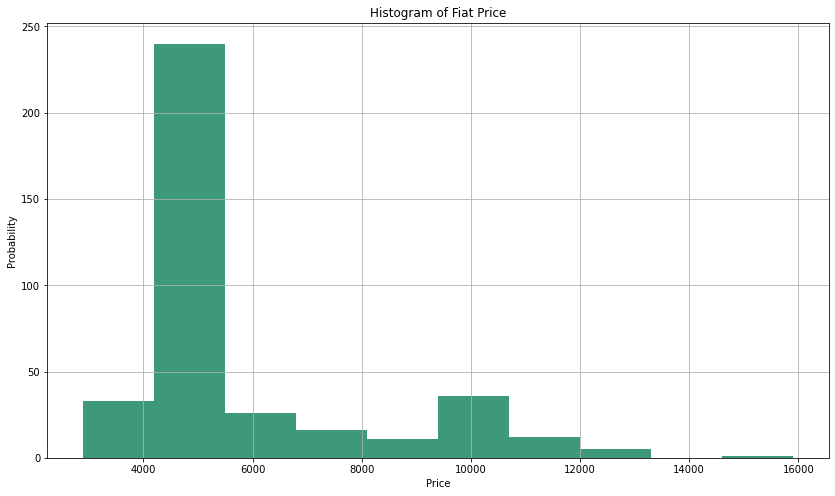

In [9]:
#Now let's try a histogram
fig = plt.figure(figsize =(14, 8))
plt.xlabel('Price')
plt.ylabel('Probability')
plt.title('Histogram of Fiat Price')
plt.grid(True)
plt.hist(data['price'],facecolor=green_col)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8433384a60>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8433392160>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7f8433384700>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8433392820>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8433392b80>],
 'means': []}

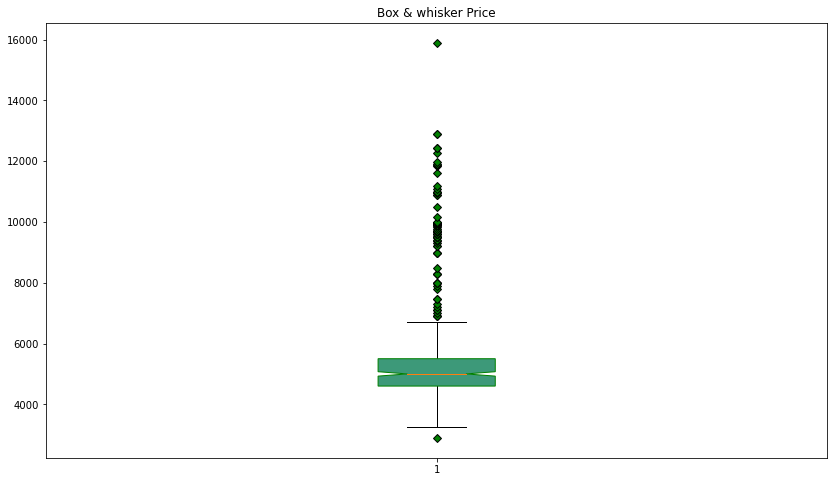

In [10]:
#Now we will try a Box & Wiskers plot
fig = plt.figure(figsize =(14, 8))
ax = fig.add_subplot()
plt.title("Box & whisker Price")
green_diamond = dict(markerfacecolor='g', marker='D')
green_whisker = dict(facecolor=green_col, color="green")


plt.boxplot(data['price'],flierprops=green_diamond,notch=True,patch_artist=True,boxprops=green_whisker)

In [11]:
#Deeper view to Outliers
outliers = data[data['price'] > 14000]
outliers.head()

,model,engine_power,transmission,age_in_days,km,previous_owners,lat,lon,price
97,pop,69,manual,91,56779,1,45.580879,12.36937,15900


In [12]:
#first let's set the model column as categorical
data['model'] = data['model'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   model            380 non-null    category
 1   engine_power     380 non-null    int64   
 2   transmission     380 non-null    object  
 3   age_in_days      380 non-null    int64   
 4   km               380 non-null    int64   
 5   previous_owners  380 non-null    int64   
 6   lat              380 non-null    float64 
 7   lon              380 non-null    float64 
 8   price            380 non-null    int64   
dtypes: category(1), float64(2), int64(5), object(1)
memory usage: 24.4+ KB


Text(0.5, 0.98, 'Categorical Plotting')

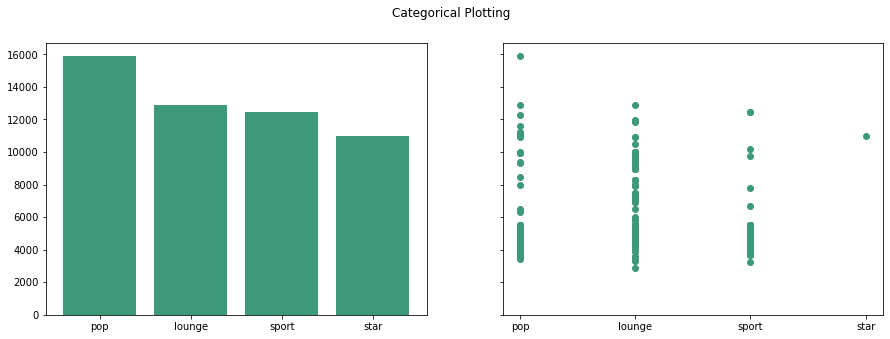

In [13]:
#next let's plot per category how the data distribution looks like
models = list(data['model'])
values = list(data['price'])

fig, axs = plt.subplots(1, 2, figsize=(15,5), sharey=True)
axs[0].bar(models, values, facecolor=green_col)
axs[1].scatter(models, values, facecolor=green_col)
fig.suptitle('Categorical Plotting')

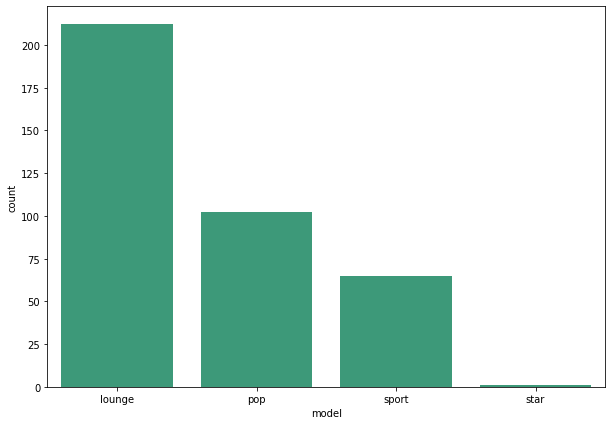

In [14]:
#Make a countplot to see how many models are sold
countplt, ax = plt.subplots(figsize = (10,7))
ax =sns.countplot(x = 'model', data=data,facecolor=green_col)

In [15]:
#Unique star model 
star = data[data['model'] == 'star']
star.head()

,model,engine_power,transmission,age_in_days,km,previous_owners,lat,lon,price
83,star,69,manual,275,7900,1,45.351528,10.84409,10990


In [16]:
#Make all columns numeric
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   model            380 non-null    category
 1   engine_power     380 non-null    int64   
 2   transmission     380 non-null    object  
 3   age_in_days      380 non-null    int64   
 4   km               380 non-null    int64   
 5   previous_owners  380 non-null    int64   
 6   lat              380 non-null    float64 
 7   lon              380 non-null    float64 
 8   price            380 non-null    int64   
dtypes: category(1), float64(2), int64(5), object(1)
memory usage: 24.4+ KB


In [17]:
#the only two columns that are not numeric are 'model' and ' transmission'.
#to show how we have changed the values, let's encode this manually
model_dict = {'pop':4, 'lounge':3, 'sport':2, 'star':1}
data['model'].replace(model_dict, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   model            380 non-null    int64  
 1   engine_power     380 non-null    int64  
 2   transmission     380 non-null    object 
 3   age_in_days      380 non-null    int64  
 4   km               380 non-null    int64  
 5   previous_owners  380 non-null    int64  
 6   lat              380 non-null    float64
 7   lon              380 non-null    float64
 8   price            380 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 26.8+ KB


In [18]:
data.head(8)

,model,engine_power,transmission,age_in_days,km,previous_owners,lat,lon,price
0,4,69,manual,4474,56779,2,45.071079,7.46403,4490
1,3,69,manual,2708,160000,1,45.069679,7.70492,4500
2,3,69,automatic,3470,170000,2,45.514599,9.28434,4500
3,2,69,manual,3288,132000,2,41.903221,12.49565,4700
4,2,69,manual,3712,124490,2,45.532661,9.03892,4790
5,3,69,manual,3684,91000,1,40.774780,14.59192,4900
6,3,69,automatic,4353,90068,1,41.726700,13.00980,4950
7,4,69,manual,4414,69000,2,45.056599,9.70176,5290


In [19]:
#the only two columns that are not numeric are 'model' and ' transmission'.
#to show how we have changed the values, let's encode this manually
trans_dict = {'manual':1, 'automatic':2}
data['transmission'].replace(trans_dict, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   model            380 non-null    int64  
 1   engine_power     380 non-null    int64  
 2   transmission     380 non-null    int64  
 3   age_in_days      380 non-null    int64  
 4   km               380 non-null    int64  
 5   previous_owners  380 non-null    int64  
 6   lat              380 non-null    float64
 7   lon              380 non-null    float64
 8   price            380 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 26.8 KB


In [20]:
data.head(8)

,model,engine_power,transmission,age_in_days,km,previous_owners,lat,lon,price
0,4,69,1,4474,56779,2,45.071079,7.46403,4490
1,3,69,1,2708,160000,1,45.069679,7.70492,4500
2,3,69,2,3470,170000,2,45.514599,9.28434,4500
3,2,69,1,3288,132000,2,41.903221,12.49565,4700
4,2,69,1,3712,124490,2,45.532661,9.03892,4790
5,3,69,1,3684,91000,1,40.774780,14.59192,4900
6,3,69,2,4353,90068,1,41.726700,13.00980,4950
7,4,69,1,4414,69000,2,45.056599,9.70176,5290


## Selecting most important features

In [21]:
#First we need to split the dataset in the y-column (the target) and the components (X), the independent columns. 
#This is needed as we need to use the X columns to predict the y in the model. 

y = data['price'] #the column we want to predict 
X = data.drop(labels = ['price'], axis = 1)  #independent columns 

In [22]:
#as Longitude and latitude are features which need to be combined to have an influence, we will drop them for now. 
X = X.drop(labels = ['lon', 'lat'], axis =1)

<Figure size 1080x360 with 0 Axes>

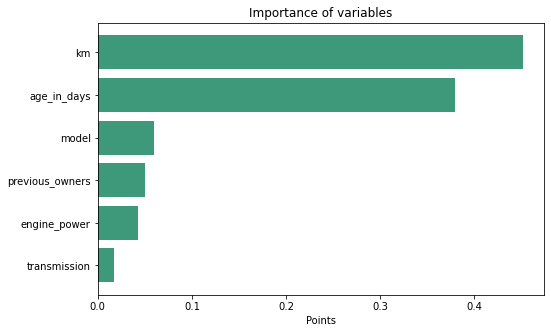

In [75]:
#TEST 1 - ExtraTreesClassifier - GOOD IF YOU USE DECISION TREE MODELS
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
#print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#print(X.columns)

#plot graph of feature importances for better visualization
feat_importances = pd.DataFrame(model.feature_importances_, index=X.columns,columns=["importance"]) 
imp = feat_importances.sort_values(by=['importance'],ascending=False)

plt.figure(figsize=(15,5))
fig, ax = plt.subplots(figsize=(8, 5))
ax.barh(imp.index,imp["importance"],color=green_col)
ax.invert_yaxis()
ax.set_title("Importance of variables")
ax.set_xlabel("Points")

plt.show()

<Figure size 1080x360 with 0 Axes>

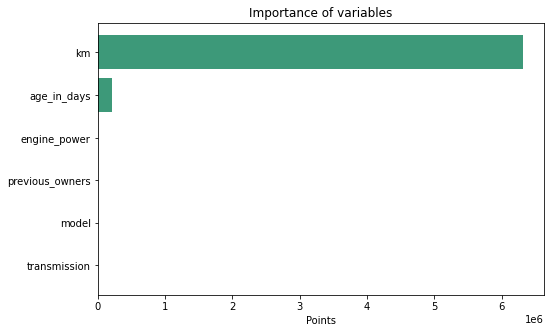

In [76]:
#TEST 2 - SelectKBest - GOOD IF YOU USE A K-NEAREST NEIGHBOR MODEL
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Name of the column','Score']  #naming the dataframe columns
featureScores = featureScores.sort_values(by=['Score'],ascending=False)
#print(featureScores.nlargest(10,'Score'))  #print 10 best features
imp = pd.DataFrame(featureScores)

#plot graph of feature importances for better visualization
plt.figure(figsize=(15,5))
fig, ax = plt.subplots(figsize=(8, 5))
ax.barh(imp["Name of the column"],imp["Score"],color=green_col)
ax.invert_yaxis()
ax.set_title("Importance of variables")
ax.set_xlabel("Points")

plt.show()


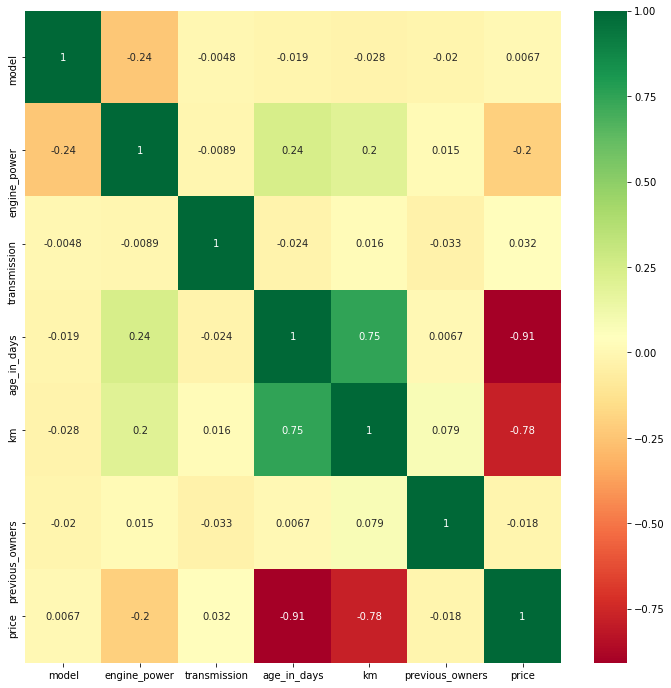

In [69]:
#TEST 3 - Correlations - Linear and logistic regression like correlated data to have a good prediction
#get correlations of each features in dataset
corrmat = data.drop(labels =['lon', 'lat'], axis = 1) #this is because it is the original target column and therefore has a high correlation with our percentage column
corrmat = corrmat.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(12,12))

#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Linear Regression model

In [77]:
#Load the chosen model here
from sklearn.linear_model import LinearRegression

### Split train test model

In [79]:
from sklearn.model_selection import train_test_split

#First try with all features

#I want to withhold 35 % of the trainset to perform the tests
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.35 , random_state = 25)

print('Shape of X_train is: ', X_train.shape)
print('Shape of X_test is: ', X_test.shape)
print('Shape of Y_train is: ', y_train.shape)
print('Shape of y_test is: ', y_test.shape)

Shape of X_train is:  (247, 6)
Shape of X_test is:  (133, 6)
Shape of Y_train is:  (247,)
Shape of y_test is:  (133,)


In [80]:
#To check the model, I want to build a check:
import math
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj)) #This is the number we will be focussing on. 
    #A good model would have an adjusted R2 of >70%, a bad model below this. 

In [81]:
# Linear regression model
model = LinearRegression() 
model.fit(X_train, y_train)

LinearRegression()

In [82]:
#Now let's see how this model performs
Predictions = model.predict(X_test)
print_metrics(y_test, Predictions, 6)

Mean Square Error      = 855710.904845218
Root Mean Square Error = 925.0464338860066
Mean Absolute Error    = 615.8743867209258
Median Absolute Error  = 469.42144369691596
R^2                    = 0.7983534747622312
Adjusted R^2           = 0.790414635185941
